In [6]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores

from transformers import ViTForImageClassification

In [7]:
dir = '../../../_data/fig-symmetry-vision-transformers/DeiT-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [8]:
path = ["vit.encoder.layer[", "].attention.attention.query.weight", "].attention.attention.key.weight"]

'DeiT tiny (5M parameters)'
dh = 64
patch = 16
l = 12
d = 192
h = d // dh
model = ViTForImageClassification.from_pretrained('facebook/deit-tiny-patch16-224')
sym_scores = get_scores(d, l, h, dh, model, path)
models['DeiTtiny-16-224'] = [l, d, h, dh, sym_scores]

'DeiT small (22M parameters)'
dh = 64
patch = 16
l = 12
d = 384
h = d // dh
model = ViTForImageClassification.from_pretrained('facebook/deit-small-patch16-224')
sym_scores = get_scores(d, l, h, dh, model, path)
models['DeiTsmall-16-224'] = [l, d, h, dh, sym_scores]

'DeiT base (86M parameters)'
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = ViTForImageClassification.from_pretrained('facebook/deit-base-patch16-224')
sym_scores = get_scores(d, l, h, dh, model, path)
models['DeiTbase-16-224'] = [l, d, h, dh, sym_scores]

'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

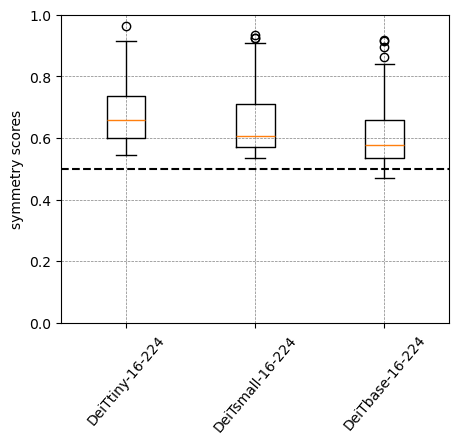

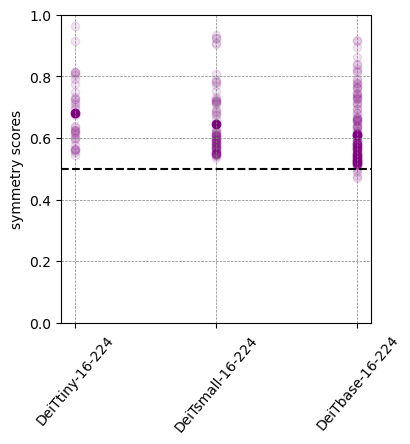

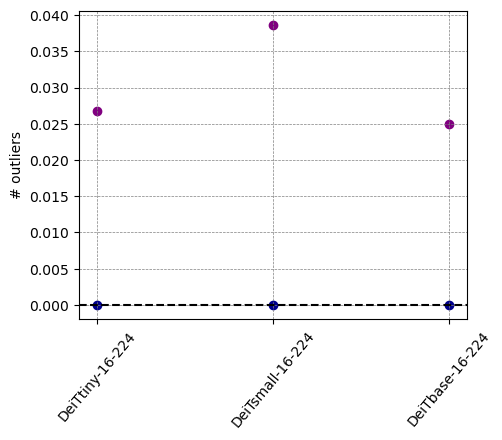

In [9]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)